In [381]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [382]:
data = pd.read_csv('30uA.csv', skiprows = [0, 1, 2], delimiter = '\t')
data.dropna(axis = 1, how = 'all', inplace = True)
# data.drop(labels = np.arange(30), axis = 0, inplace = True)
# display(data)

nonzero_field = np.abs(data['B-Field (Gauss)']) > 50
nonzero_table = data.where(nonzero_field).dropna()
display(nonzero_table)

I_AB = nonzero_table['sample I AB']
I_BA = nonzero_table['sample I -AB']

I_AD = nonzero_table['sample I AD']
I_DA = nonzero_table['sample I -AD']

I_AC = nonzero_table['sample I AC']
I_CA = nonzero_table['sample I -AC']

I_BD = nonzero_table['sample I BD']
I_DB = nonzero_table['sample I -BD']

V_AC = nonzero_table['Voltage AC']
V_CA = nonzero_table['Voltage -AC']

V_BD = nonzero_table['Voltage BD']
V_DB = nonzero_table['Voltage -BD']

V_BC = nonzero_table['Voltage BC']
V_CB = nonzero_table['Voltage -BC']

V_DC = nonzero_table['Voltage DC']
V_CD = nonzero_table['Voltage -DC']

field = nonzero_table['B-Field (Gauss)']
T = nonzero_table['Temperature (K)']

,Temperature (K),B-Field (Gauss),sample I AB,sample I AD,sample I AC,sample I BD,sample I -AB,sample I -AD,sample I -AC,sample I -BD,Voltage DC,Voltage BC,Voltage BD,Voltage AC,Voltage -DC,Voltage -BC,Voltage -BD,Voltage -AC
0,96.065,-4135.0,0.00003,0.00003,0.00003,0.00003,-0.00003,-0.00003,-0.00003,-0.00003,0.007238,0.009030,0.027186,0.024598,-0.007345,-0.009805,-0.028443,-0.025500
2,98.680,4120.0,0.00003,0.00003,0.00003,0.00003,-0.00003,-0.00003,-0.00003,-0.00003,0.007774,0.008224,-0.025440,-0.028271,-0.007891,-0.008886,0.024328,0.027293
3,100.295,-4133.0,0.00003,0.00003,0.00003,0.00003,-0.00003,-0.00003,-0.00003,-0.00003,0.007763,0.009714,0.027447,0.024596,-0.007894,-0.010482,-0.028677,-0.025485
5,102.950,4118.0,0.00003,0.00003,0.00003,0.00003,-0.00003,-0.00003,-0.00003,-0.00003,0.008343,0.008915,-0.025433,-0.028512,-0.008485,-0.009583,0.024326,0.027554
6,104.505,-4132.0,0.00003,0.00003,0.00003,0.00003,-0.00003,-0.00003,-0.00003,-0.00003,0.008337,0.010413,0.027667,0.024596,-0.008477,-0.011181,-0.028875,-0.025468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,341.800,4099.0,0.00003,0.00003,0.00003,0.00003,-0.00003,-0.00003,-0.00003,-0.00003,0.000286,0.000371,-0.000013,-0.000140,-0.000874,-0.000961,-0.000476,-0.000243
161,343.650,-4113.0,0.00003,0.00003,0.00003,0.00003,-0.00003,-0.00003,-0.00003,-0.00003,0.000257,0.000315,-0.000312,-0.000416,-0.000820,-0.000916,-0.000208,0.000009
163,346.600,4099.0,0.00003,0.00003,0.00003,0.00003,-0.00003,-0.00003,-0.00003,-0.00003,0.000189,0.000258,-0.000050,-0.000142,-0.000775,-0.000850,-0.000433,-0.000229
164,348.450,-4111.0,0.00003,0.00003,0.00003,0.00003,-0.00003,-0.00003,-0.00003,-0.00003,0.000166,0.000218,-0.000303,-0.000372,-0.000732,-0.000820,-0.000218,-0.000015


In [383]:
def f1(x):
    return 1/np.cosh(np.log(x)/2.403)

def f2(x):
    return 1 - ((1 - x)/(1 + x))**2 * np.log(2)/2 - ((1 - x)/(1 + x))**4 * (np.log(2)**2/4 - np.log(2)**3/12)

def compute_rho(R1, R2, d, f):
    return np.pi * d/np.log(2) * (R1 + R2)/2 * f(R1/R2)

def compute_RH(V, I, B, d):
    return ((V * d)/(I * B)).to_numpy()

def linear(x, m, b):
    return m * x + b

def exp(x, alpha):
    return x**alpha

def zero_interp(x, y):
    zero_crossings = np.where(np.diff(np.sign(y)))[0]
    x1, x2 = x[zero_crossings], x[zero_crossings + 1] 
    y1, y2 = y[zero_crossings], y[zero_crossings + 1]
    return x1 - y1 * (x2 - x1) / (y2 - y1)

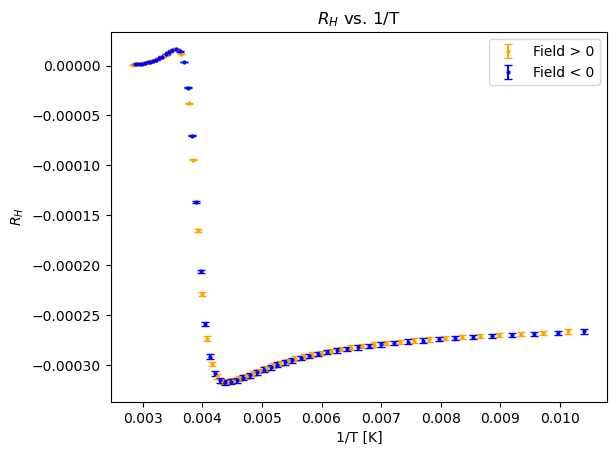

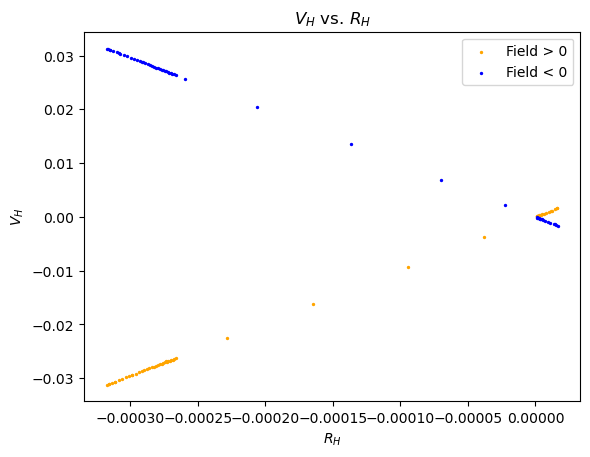

In [384]:
R_ABDC = V_DC/I_AB
R_ABDC_neg = -V_CD/I_BA

R_ADBC = V_BC/I_AD
R_ADBC_neg = -V_CB/I_DA

d = 1.25e-3
d_err = 0.01e-3

RH = np.array([compute_RH(V_AC, I_BD, field, d), compute_RH(V_BD, I_AC, field, d), compute_RH(V_DB, I_CA, field, d), compute_RH(V_CA, I_DB, field, d)])
RH_err = np.abs(np.array([compute_RH(V_AC, I_BD, field, d_err), compute_RH(V_BD, I_AC, field, d_err), compute_RH(V_DB, I_CA, field, d_err), compute_RH(V_CA, I_DB, field, d_err)]))

plt.errorbar(1/T[field > 0], np.mean(RH, axis = 0)[field > 0], yerr = np.mean(RH_err, axis = 0)[field > 0], c = 'orange',  fmt = 'o', capsize=3, markersize = 2)
plt.errorbar(1/T[field < 0], np.mean(RH, axis = 0)[field < 0], yerr = np.mean(RH_err, axis = 0)[field < 0], c = 'blue',  fmt = 'o', capsize=3, markersize = 2)
plt.title("$R_H$ vs. 1/T") 
plt.ylabel("$R_H$")
plt.xlabel("1/T [K]")
plt.legend(['Field > 0', 'Field < 0'])
plt.show()

plt.scatter(np.mean(RH, axis = 0)[field > 0], np.mean([V_AC, V_BD, -V_CA, -V_DB], axis = 0)[field > 0], s = 2, c = 'orange')
plt.scatter(np.mean(RH, axis = 0)[field < 0], np.mean([V_AC, V_BD, -V_CA, -V_DB], axis = 0)[field < 0], s = 2, c = 'blue')
plt.legend(['Field > 0', 'Field < 0'])
plt.title("$V_H$ vs. $R_H$")
plt.xlabel('$R_H$')
plt.ylabel('$V_H$')
plt.show()

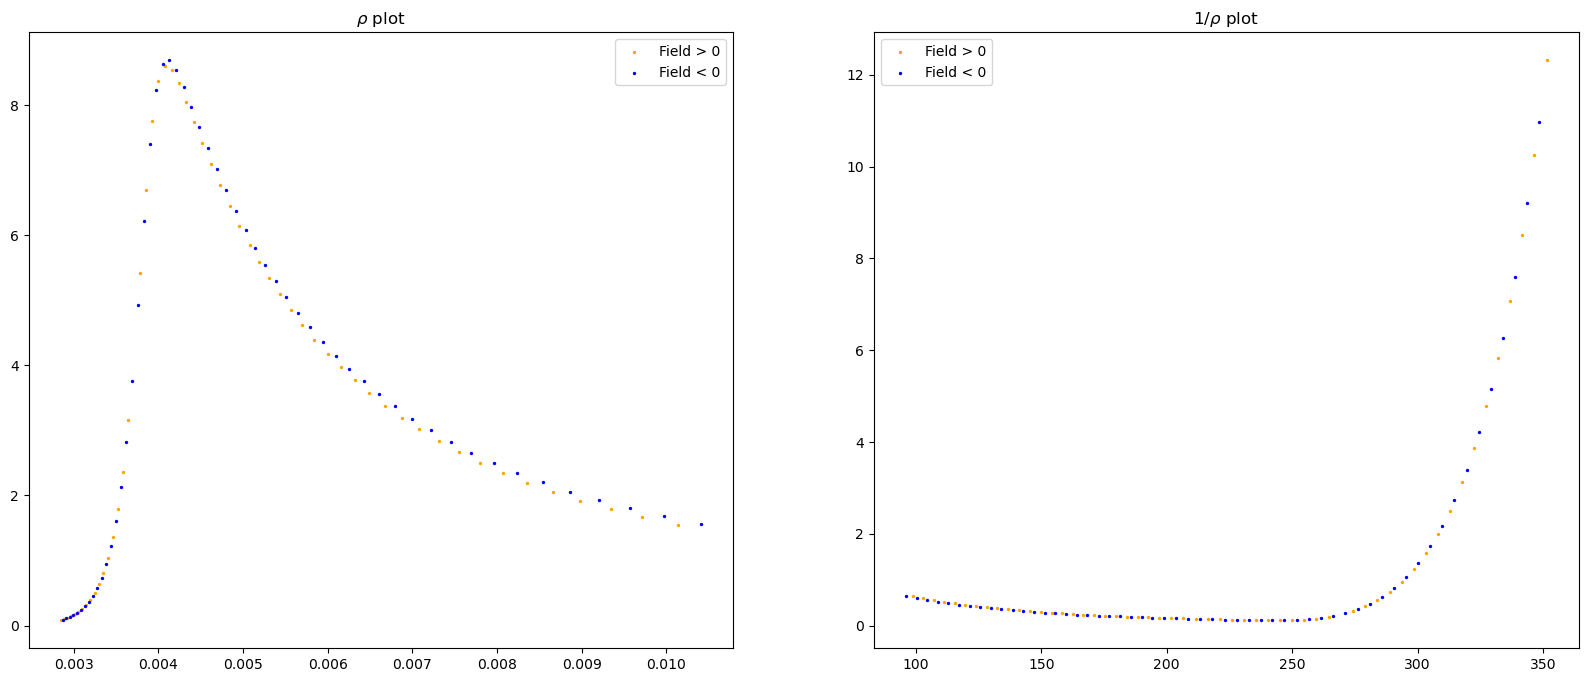

[]
271.2


In [385]:
fig, axes = plt.subplots(ncols = 2, figsize = (20, 8))
rho = compute_rho(R_ABDC, R_ADBC, d, f1)
# rho = rho.dropna()

rho2 = compute_rho(-R_ABDC_neg, -R_ADBC_neg, d, f1)
# rho2 = rho2.dropna()

rho = np.mean([rho, rho2], axis = 0)

axes[0].scatter(1/T[field >0], rho[field > 0], s = 2, c = 'orange')
axes[0].scatter(1/T[field < 0], rho[field < 0], s = 2, c = 'blue')
axes[0].legend(['Field > 0', 'Field < 0'])
axes[0].set_title("$\\rho$ plot")

axes[1].scatter(T[field >0], 1/rho[field > 0], s = 2, c = 'orange')
axes[1].scatter(T[field < 0], 1/rho[field < 0], s = 2, c = 'blue')
axes[1].legend(['Field > 0', 'Field < 0'])
axes[1].set_title("$1/\\rho$ plot")
plt.show()

print(rho[rho < 0])
print(T[116])
# print(rho.dropna())
# rho = rho.dropna()

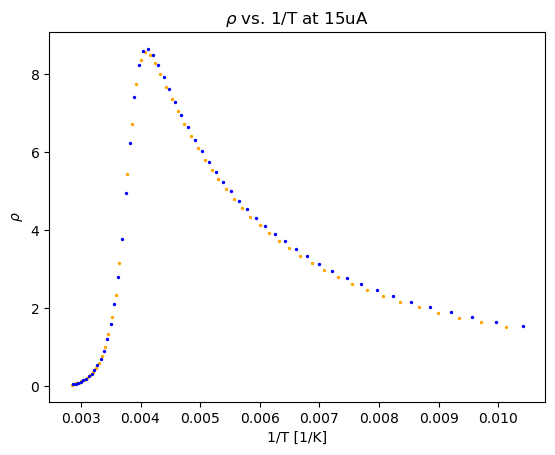

In [386]:
rho = compute_rho(R_ABDC, R_ADBC, d, f1)
plt.scatter(1/T[field > 0], rho[field > 0], s = 2, c = 'orange')
plt.scatter(1/T[field < 0], rho[field < 0], s = 2, c = 'blue')
plt.title("$\\rho$ vs. 1/T at 15uA")
plt.xlabel('1/T [1/K]')
plt.ylabel('$\\rho$')
plt.show()

[-1.88052488]


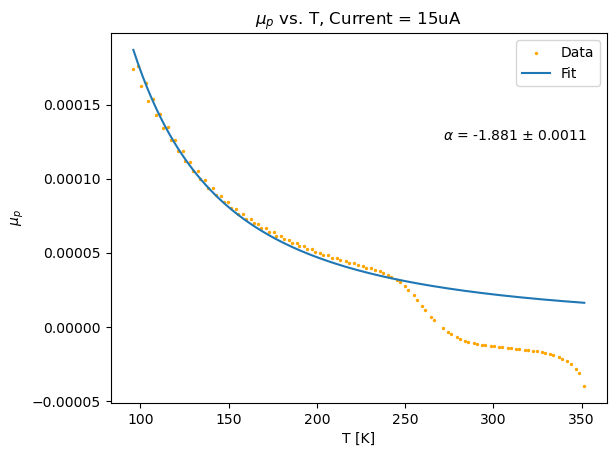

In [387]:
# p = -np.array(RH) * e
e = 1.6e-19
RH_avg = np.mean(RH, axis = 0)

p = -1/(RH_avg * e) # computes the hole mobility in extrinsic regime

mu_p = 1/(rho * e * p)

fit, cov = opt.curve_fit(exp, T[T < 200], mu_p[T < 200])
alpha_fit = fit
alpha_err = np.sqrt(np.diag(cov))
print(alpha_fit)

x_vals = np.linspace(np.min(T), np.max(T), 200)
plt.scatter(T, mu_p, s = 2, c = 'orange')
plt.plot(x_vals, exp(x_vals, alpha_fit))
plt.legend(['Data', 'Fit'])
plt.title(f"$\\mu_p$ vs. T, Current = 15uA")
plt.xlabel("T [K]")
plt.ylabel("$\\mu_p$")
plt.text(np.max(T) - 80, np.max(mu_p) - 5e-5, f"$\\alpha$ = {np.round(alpha_fit[0], 3)} \u00b1 {np.round(alpha_err[0], 4)}")
plt.show()

In [388]:
N_a = np.mean(p[T < 200])
sigma = mu_p * e * N_a
T_zero = zero_interp(T.values, RH_avg)[0]

sigma_e = T_zero**alpha_fit * e * N_a
sigma_0 = np.interp(x = T_zero, xp = T.values, fp = 1/rho)

b = 1/(1 - sigma_e/sigma_0)
n = N_a/(b**2 - 1)

print(f'p in extrinsic: {N_a}, p in intrinsic: {N_a + n[0]}')
print(f'n in extrinsic: 0, n in intrinsic: {n[0]}')

p in extrinsic: 2.2179190951397705e+22, p in intrinsic: 3.6902658624873885e+22
n in extrinsic: 0, n in intrinsic: 1.4723467673476178e+22


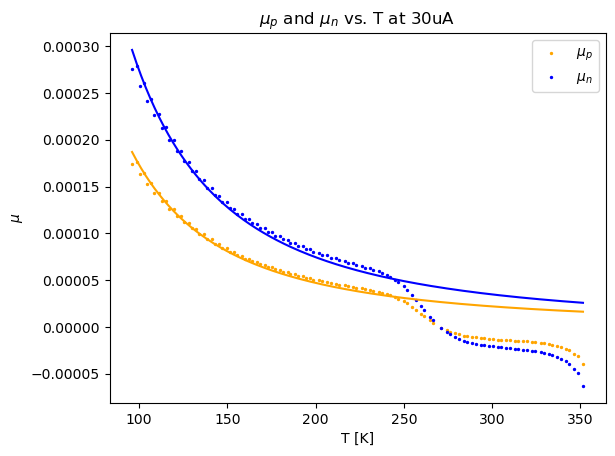

In [391]:
mu_n = b * mu_p
x_vals = np.linspace(np.min(T), np.max(T), 200)
plt.scatter(T, mu_p, s = 2, c = 'orange')
plt.scatter(T, mu_n, s = 2, c = 'blue')
plt.plot(x_vals, exp(x_vals, alpha_fit), c = 'orange')
plt.plot(x_vals, b * exp(x_vals, alpha_fit), c = 'blue')
plt.title('$\\mu_p$ and $\\mu_n$ vs. T at 30uA')
plt.xlabel('T [K]')
plt.ylabel('$\\mu$')
plt.legend(['$\\mu_p$', '$\\mu_n$'])
plt.show()

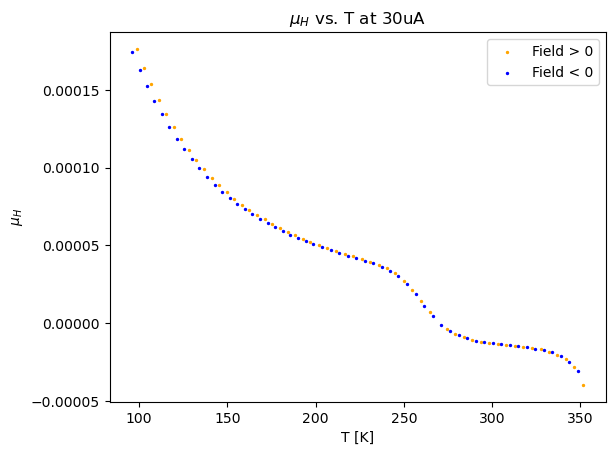

In [401]:
plt.scatter(T[field > 0], -RH_avg[field > 0] * 1/rho[field > 0], s = 2, c = 'orange')
plt.scatter(T[field < 0], -RH_avg[field < 0] * 1/rho[field < 0], s = 2, c = 'blue')
plt.legend(['Field > 0', 'Field < 0'])
plt.xlabel('T [K]')
plt.ylabel('$\\mu_H$')
plt.title('$\\mu_H$ vs. T at 30uA')
plt.show()


# print(T.values[p < 0][-12])
# plt.hlines(np.mean(p[T < 150]), 100, 300)

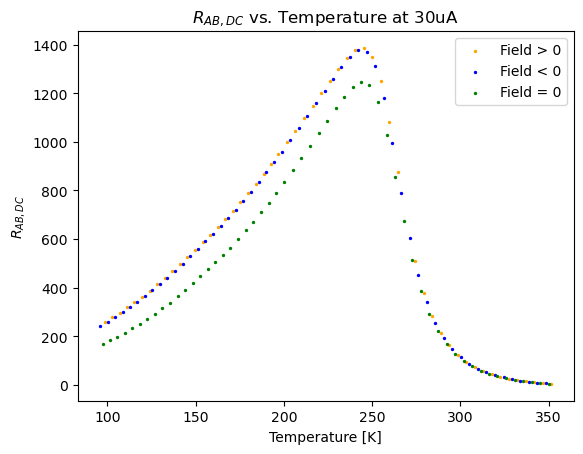

In [432]:
plt.scatter(T[field > 0], R_ABDC[field > 0], s = 2, c = 'orange')
plt.scatter(T[field < 0], R_ABDC[field < 0], s = 2, c = 'blue')

zero_table = data.where(~nonzero_field).dropna()
V_DC_zero = zero_table['Voltage DC']
I_AB_zero = zero_table['sample I AB']
temp_zero = zero_table['Temperature (K)']

plt.scatter(temp_zero, V_DC_zero/I_AB_zero, s = 2, c = 'green')
plt.title('$R_{AB, DC}$ vs. Temperature at 30uA')
plt.xlabel('Temperature [K]')
plt.ylabel('$R_{AB, DC}$')
plt.legend(['Field > 0', 'Field < 0', 'Field = 0'])
plt.show()
# plt.scatter(zero_table['Temperature (K)'][np.abs(field) < 50], zero_table['Voltage[np.abs(field) < 50], s = 2)

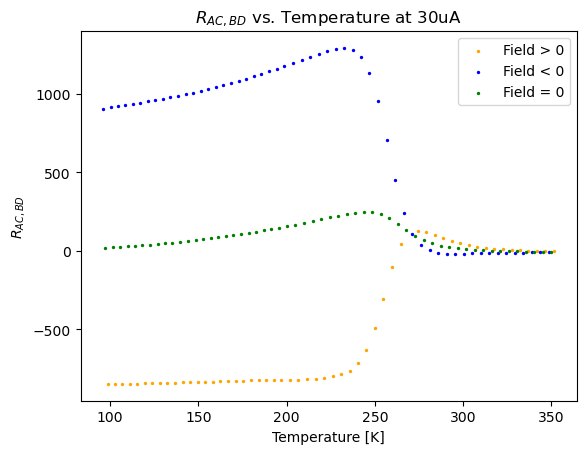

In [436]:
R_ACBD = V_BD/I_AC

plt.scatter(T[field > 0], R_ACBD[field > 0], s = 2, c = 'orange')
plt.scatter(T[field < 0], R_ACBD[field < 0], s = 2, c = 'blue')

V_BD_zero = zero_table['Voltage BD']
I_AC_zero = zero_table['sample I AC']
temp_zero = zero_table['Temperature (K)']

plt.scatter(temp_zero, V_BD_zero/I_AC_zero, s = 2, c = 'green')
plt.title('$R_{AC, BD}$ vs. Temperature at 30uA')
plt.xlabel('Temperature [K]')
plt.ylabel('$R_{AC, BD}$')
plt.legend(['Field > 0', 'Field < 0', 'Field = 0'])
plt.show()